# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package.

**Please note:** You need to answer only the questions that match your ID first digit.

## Install Dependecies

In [ ]:
!pip install kaggle pony diffusers==0.11.1 transformers scipy ftfy accelerate

: 

# 1. Babies Names Dataset (35pt)

### Imports

In [ ]:
import json
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

### Download Dataset

In [ ]:
api_token = {"username":"guyarieli","key":""}
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Download csv
!kaggle datasets download kaggle/us-baby-names
!unzip us-baby-names.zip

Archive:  us-baby-names.zip
  inflating: NationalNames.csv       
  inflating: NationalReadMe.pdf      
  inflating: StateNames.csv          
  inflating: StateReadMe.pdf         
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
state_names = pd.read_csv("StateNames.csv")
db_connect = sqlite3.connect("database.sqlite")
cursor_obj = db_connect.cursor()

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
cursor_obj.execute("""CREATE TABLE IF NOT EXISTS Names(
  State TEXT not null,
  Gender TEXT not null,
  Name TEXT not null,
  Count INTEGER not null,
  Year INTEGER not null)""")

##### Bounos

In [ ]:
cursor_obj.executemany(
    ("INSERT INTO Names(State, Gender, Name, Count, Year) values (?,?,?,?,?)"),
    state_names[["State", "Gender", "Name", "Count", "Year"]].to_numpy()
)

**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [ ]:
%%timeit -r 1 -n 1
print(
    "Total number people named mary that are male:",
    cursor_obj.execute("SELECT SUM(Count) FROM Names where Name=='Mary' AND Gender='M'"
             ).fetchall()
)
print(
    "Total number of people named mary per state:",
    cursor_obj.execute(
        "SELECT State, SUM(Count) FROM Names where Name=='Mary' GROUP BY State"
    ).fetchall()
)
print(
    "Total number of people named Mary:",
    cursor_obj.execute("SELECT SUM(Count) FROM Names where Name=='Mary'").fetchall()
)
print("Total number of people named Mary that are female:",
    cursor_obj.execute("SELECT SUM(Count) FROM Names where Name=='Mary' AND Gender='F'"
             ).fetchall()
)

Total number people named mary that are male: [(9639,)]
Total number of people named mary per state: [('AK', 3936), ('AL', 115889), ('AR', 58679), ('AZ', 22752), ('CA', 152533), ('CO', 31586), ('CT', 41659), ('DC', 22390), ('DE', 8407), ('FL', 66280), ('GA', 124895), ('HI', 5776), ('IA', 61742), ('ID', 9894), ('IL', 200359), ('IN', 100727), ('KS', 43053), ('KY', 103433), ('LA', 78575), ('MA', 116272), ('MD', 63880), ('ME', 14579), ('MI', 137387), ('MN', 70695), ('MO', 105655), ('MS', 87101), ('MT', 12889), ('NC', 133604), ('ND', 13036), ('NE', 30060), ('NH', 8451), ('NJ', 90392), ('NM', 23823), ('NV', 3317), ('NY', 277372), ('OH', 201281), ('OK', 55856), ('OR', 19702), ('PA', 292159), ('RI', 16503), ('SC', 83725), ('SD', 14218), ('TN', 105815), ('TX', 210119), ('UT', 13590), ('VA', 96140), ('VT', 7653), ('WA', 34015), ('WI', 83881), ('WV', 58586), ('WY', 6174)]
Total number of people named Mary: [(3740495,)]
Total number of people named Mary that are female: [(3730856,)]
3.54 s ± 0 ns 

#### Bonus

In [ ]:
%%timeit -r 1 -n 1
cursor_obj.execute("DROP INDEX IF EXISTS names_index")
cursor_obj.execute("CREATE INDEX IF NOT EXISTS names_index ON Names (name);")

5.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -r 1 -n 1
print(
    "Total number people named mary that are male:",
    cursor_obj.execute("SELECT SUM(Count) FROM Names where Name=='Mary' AND Gender='M'"
             ).fetchall()
)
print(
    "Total number of people named mary per state:",
    cursor_obj.execute(
        "SELECT State, SUM(Count) FROM Names where Name=='Mary' GROUP BY State"
    ).fetchall()
)
print(
    "Total number of people named Mary:",
    cursor_obj.execute("SELECT SUM(Count) FROM Names where Name=='Mary'").fetchall()
)
print("Total number of people named Mary that are female:",
    cursor_obj.execute("SELECT SUM(Count) FROM Names where Name=='Mary' AND Gender='F'"
             ).fetchall()
)

Total number people named mary that are male: [(9639,)]
Total number of people named mary per state: [('AK', 3936), ('AL', 115889), ('AR', 58679), ('AZ', 22752), ('CA', 152533), ('CO', 31586), ('CT', 41659), ('DC', 22390), ('DE', 8407), ('FL', 66280), ('GA', 124895), ('HI', 5776), ('IA', 61742), ('ID', 9894), ('IL', 200359), ('IN', 100727), ('KS', 43053), ('KY', 103433), ('LA', 78575), ('MA', 116272), ('MD', 63880), ('ME', 14579), ('MI', 137387), ('MN', 70695), ('MO', 105655), ('MS', 87101), ('MT', 12889), ('NC', 133604), ('ND', 13036), ('NE', 30060), ('NH', 8451), ('NJ', 90392), ('NM', 23823), ('NV', 3317), ('NY', 277372), ('OH', 201281), ('OK', 55856), ('OR', 19702), ('PA', 292159), ('RI', 16503), ('SC', 83725), ('SD', 14218), ('TN', 105815), ('TX', 210119), ('UT', 13590), ('VA', 96140), ('VT', 7653), ('WA', 34015), ('WI', 83881), ('WV', 58586), ('WY', 6174)]
Total number of people named Mary: [(3740495,)]
Total number of people named Mary that are female: [(3730856,)]
57.9 ms ± 0 ns

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **Question = <YOUR_ID> mod 4 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = ""
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


***Question 1:*** Write a function that returns how many *female and* male babies were born in a given state in a given year.
Use it to calculate the number of babies born in CA in 1985 (10pt)

***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1850 and 1950  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Texas in 2000 (10pt)

In [ ]:
def most_common_female_name(state: str, year: int):
    cursor_obj.execute("""
        SELECT Name FROM Names
        WHERE Gender='F' AND State=? AND Year=?
        GROUP BY Name
        ORDER BY SUM(Count) DESC
        LIMIT 1;
    """, (state, year))
    result = cursor_obj.fetchone()
    if result:
        return result[0]

most_common_name = most_common_female_name("TX", 2000)
print(f"The most common female name in Texas in 2000 is: {most_common_name}")

The most common female name in Texas in 2000 is: Emily


**Question 4:** Write a function that returns how many male babies named _William_ where born in a given state in a given year. Use it to find the state in which the highest number of babies _William_ where born in 1950 (10pt)

The Dataset decades are between: (2010,1910)


**Question (for everyone):** For the state of WA write code that calculates the fourth most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [ ]:
def get_bound_data_set_decade():
  max_year = cursor_obj.execute("SELECT MAX(Year) FROM Names").fetchone()[0]
  min_year = cursor_obj.execute("SELECT MIN(Year) FROM Names").fetchone()[0]
  return  min_year - (min_year % 10), max_year - (max_year % 10)

def get_forth_state_name_in_state(gender: str,decade: int, state: str):
    cursor_obj.execute("""
            SELECT Name, SUM(Count)
            FROM Names
            WHERE State = ? AND Gender = ? AND Year BETWEEN ? AND ?
            GROUP BY Name
            ORDER BY SUM(Count) DESC
            LIMIT 4
        """,
        (state, gender, decade, decade + 9)
    )
    names_in_decade = cursor_obj.fetchall()
    return decade, names_in_decade[3][0], names_in_decade[3][1]

min_decade, max_decade = get_bound_data_set_decade()
print(f"The Dataset decades are between: ({min_decade},{max_decade})")
print(f"Most used Named in WA in {min_decade}-{min_decade+9}: {get_forth_state_name_in_state('F',min_decade, 'WA')}")

The Dataset decades are between: (1910,2010)
Most used Named in WA in 1910-1919: (1910, 'Margaret', 2399)


In [ ]:
def get_gender_by_each_decade(state="WA"):
  return {
      "F": [get_forth_state_name_in_state("F",decade,state) for decade in range(min_decade, max_decade + 10, 10)],
      "M": [get_forth_state_name_in_state("M",decade,state) for decade in range(min_decade, max_decade + 10, 10)]
  }

gender_by_each_decade = get_gender_by_each_decade()
gender_by_each_decade

{'F': [(1910, 'Margaret', 2399),
  (1920, 'Margaret', 2550),
  (1930, 'Shirley', 2826),
  (1940, 'Patricia', 5639),
  (1950, 'Patricia', 5963),
  (1960, 'Michelle', 3975),
  (1970, 'Heather', 4295),
  (1980, 'Sarah', 6380),
  (1990, 'Sarah', 4574),
  (2000, 'Madison', 3593),
  (2010, 'Isabella', 1635)],
 'M': [(1910, 'James', 2024),
  (1920, 'Donald', 3822),
  (1930, 'John', 4282),
  (1940, 'Richard', 8127),
  (1950, 'John', 11410),
  (1960, 'Robert', 8962),
  (1970, 'David', 7114),
  (1980, 'Joshua', 8137),
  (1990, 'Tyler', 6072),
  (2000, 'Daniel', 3996),
  (2010, 'Ethan', 1759)]}

#### Bouns

<ipython-input-50-bfa529b608f4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels())


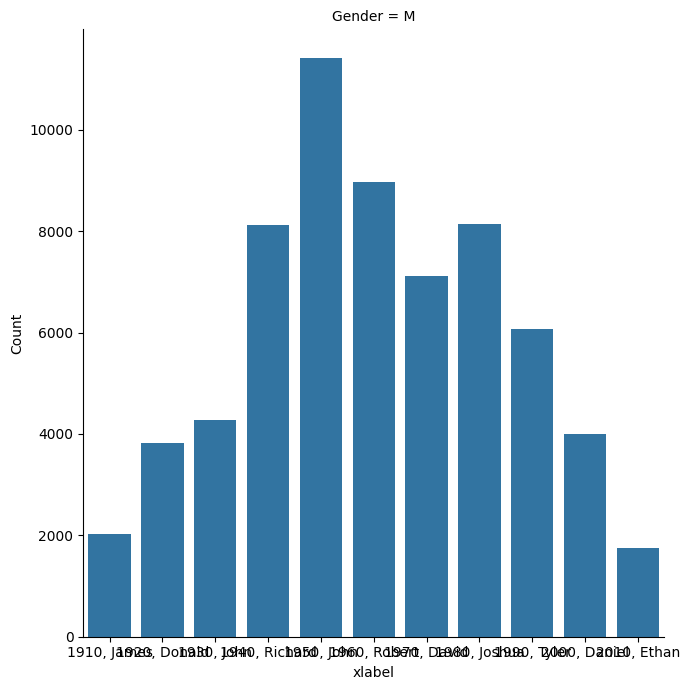

<ipython-input-50-bfa529b608f4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels())


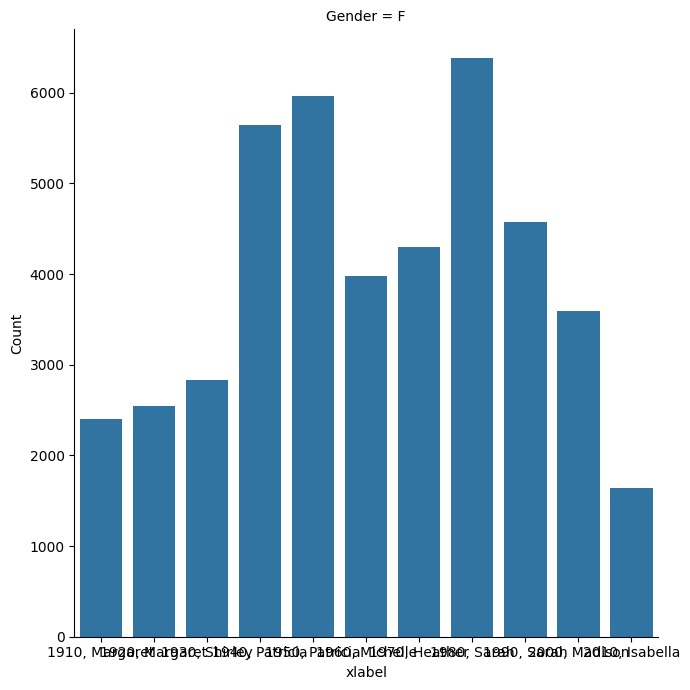

In [ ]:
def plot_list_of_third_most_popular_in_each_decade(decades: dict, gender: str):
  columns=["Gender", "Decade", "Name","Count"]
  data = [
      [gender, decade, name, count]
      for decade, name, count in decades
  ]
  df = pd.DataFrame(data,columns=columns).sort_values("Decade")
  df["xlabel"] = df["Decade"].astype(str) + ", " + df["Name"]
  grid = sns.FacetGrid(df, col="Gender", height=7)
  grid.map(sns.barplot, "xlabel", "Count", order=df["xlabel"])
  for axes in grid.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels())
  plt.tight_layout()
  plt.show()

plot_list_of_third_most_popular_in_each_decade(gender_by_each_decade["M"], "M")
plot_list_of_third_most_popular_in_each_decade(gender_by_each_decade["F"], "F")

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer one of the following questions (according to your ID):

In [ ]:
!kaggle datasets download rombikuboktaeder/choco-flavors
!unzip choco-flavors.zip

Dataset URL: https://www.kaggle.com/datasets/rombikuboktaeder/choco-flavors
License(s): CC0-1.0
choco-flavors.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  choco-flavors.zip
  inflating: flavors_of_cacao.csv    


In [ ]:
from ≈import (
    Database, Required, Optional, set_sql_debug, commit, select, avg, max, desc,
    count,distinct
)

In [ ]:
flavors_of_cacao = pd.read_csv("flavors_of_cacao.csv").dropna()
db = Database()
db.bind(
    provider='sqlite', filename='/content/flavors-of-cacao.pony.db',
    create_db=True
)

In [ ]:
class ChocoFlavor(db.Entity):
  company = Required(str)
  specific_bean_origin = Required(str)
  ref = Required(int)
  review_date = Required(int)
  cocoa_percent = Required(float)
  company_location = Required(str)
  rating = Required(float)
  bean_type = Optional(str)
  broad_bean_origin = Optional(str)

db.generate_mapping(create_tables=True)

In [ ]:
for idx, row in flavors_of_cacao.iterrows():
  ChocoFlavor(company=row[0], specific_bean_origin=row[1],
              ref=row[2], review_date=row[3], cocoa_percent=row[4][:-1],
              company_location=row[5], rating=row[6],
              bean_type=row[7], broad_bean_origin=row[8])
commit()

<ipython-input-58-47e4272e9927>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ChocoFlavor(company=row[0], specific_bean_origin=row[1],
<ipython-input-58-47e4272e9927>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ref=row[2], review_date=row[3], cocoa_percent=row[4][:-1],
<ipython-input-58-47e4272e9927>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  company_location=row[5], rating=row[6],
<ipython-input-58-47e4272e9927>:5: Fu

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Peru' (15pt)

In [ ]:
def get_number_of_bards_by_country_origin(country: str):
  return (select(c for c in ChocoFlavor if c.broad_bean_origin==country )).count()

country = "Peru"
print(f"Number of bars where broadBean Origin is '{country}'",get_number_of_bards_by_country_origin(country))

Number of bars where broadBean Origin is 'Peru' 165


**Question 2:** Write a function that returns the maximal and median cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and median cocoa percentage in bars manufactured by Israeli companies (15pt).

In [ ]:
def get_min_and_median_cocoa_percentage(country):
  cocoa_percentages = [*select(
      c.cocoa_percent
      for c in ChocoFlavor
      if c.company_location == country
  )]
  cocoa_percentages.sort()
  return min(cocoa_percentages), cocoa_percentages[len(cocoa_percentages) // 2]
  print(cocoa_percentages)

minimum, median = get_min_and_median_cocoa_percentage("Israel")
print(f"Minimal cocoa percentage: {minimum}")
print(f"Median cocoa percentage: {median}")

Minimal cocoa percentage: 70.0
Median cocoa percentage: 75.0


**Question 3:** Calculate the third most common bean type(s) and the most rare bean type(s) (15
pt)

In [ ]:
def get_most_common_bean_type():
  bean_type_dist = select(
      (c.bean_type, count(c))
      for c in ChocoFlavor
      if c.bean_type!=''
  ).order_by(lambda bean_type, c: c)
  return list(bean_type_dist)[3][0]

def get_rarest_most_type():
   bean_type_dist=select((c.bean_type,count(c)) for c in ChocoFlavor if c.bean_type!='').order_by(lambda bean_type,c:-c)
   return list(bean_type_dist)[0][0]

print(f"Most common bean type: {get_most_common_bean_type()}")
print(f"Most rare bean type: {get_rarest_most_type()}")

Most common bean type: Criollo (Ocumare 67)
Most rare bean type: Trinitario


**Question 4:** Calculate the number of reviews and the median rating in each year. Calculate the number of reviews and the median rating of each company in each year (15pt)

In [ ]:
def get_all_years():
  return sorted(list(select(distinct(c.review_date) for c in ChocoFlavor)))

def get_median_and_number_of_review_each_year(year: int):
    data = [
      *select(
        c.rating
        for c in ChocoFlavor
        if c.review_date == year
    ).order_by(lambda c: c)
    ]
    n_review = len(data)
    return n_review, data[n_review // 2]

for year in get_all_years():
  n_review, meadiean = get_median_and_number_of_review_each_year(year)
  print(f"In {year} had {n_review} reviews with median rating of {meadiean}")

In 2006 had 72 reviews with median rating of 3.0
In 2007 had 77 reviews with median rating of 3.0
In 2008 had 93 reviews with median rating of 3.0
In 2009 had 123 reviews with median rating of 3.0
In 2010 had 111 reviews with median rating of 3.25
In 2011 had 164 reviews with median rating of 3.25
In 2012 had 194 reviews with median rating of 3.25
In 2013 had 184 reviews with median rating of 3.25
In 2014 had 247 reviews with median rating of 3.25
In 2015 had 285 reviews with median rating of 3.25
In 2016 had 219 reviews with median rating of 3.25
In 2017 had 24 reviews with median rating of 3.5


# 3. Kickstarter Projects Dataset (25pt)

### Imports

In [ ]:
from pony.orm import group_concat
from pony.converting import str2datetime
from datetime import datetime

#### Load

In [ ]:
!kaggle datasets download -d kemical/kickstarter-projects
!unzip -o ./kickstarter-projects.zip

Dataset URL: https://www.kaggle.com/datasets/kemical/kickstarter-projects
License(s): CC-BY-NC-SA-4.0
kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./kickstarter-projects.zip
  inflating: ks-projects-201612.csv  
  inflating: ks-projects-201801.csv  


Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
ks_project = pd.read_csv("ks-projects-201801.csv", encoding="ISO-8859-1")
ks_project["usd pledged"].fillna(0.0, inplace=True)
ks_project["name"].fillna("", inplace=True)

<ipython-input-121-765f03ee57e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ks_project["usd pledged"].fillna(0.0, inplace=True)
<ipython-input-121-765f03ee57e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
db = Database()
db.bind(
    provider='sqlite', filename='/content/kickstarter-project.pony.db',
    create_db=True
)

In [ ]:
class KickstarterProject(db.Entity):
  name = Optional(str)
  category = Required(str)
  main_category = Required(str)
  currency = Required(str)
  deadline = Required(str)
  goal = Required(float)
  launched = Required(datetime)
  pledged = Required(float)
  state = Required(str)
  backers = Required(int)
  country = Required(str)
  usd_pledged = Optional(float)
  usd_pledged_real = Required(float)
  usd_goal_real = Required(float)

db.generate_mapping(create_tables=True)

In [ ]:
for idx, row in ks_project.iterrows():
  KickstarterProject(
      name=row[1], category=row[2], main_category=row[3], currency=row[4],
      deadline=row[5], goal=row[6], launched=row[7], pledged=row[8],
      state=row[9], backers=row[10], country=row[11], usd_pledged=row[12],
      usd_pledged_real=row[13], usd_goal_real=row[14]
  )
commit()

<ipython-input-156-c12d58d7a8a6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name=row[1], category=row[2], main_category=row[3], currency=row[4],
<ipython-input-156-c12d58d7a8a6>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deadline=row[5], goal=row[6], launched=row[7], pledged=row[8],
<ipython-input-156-c12d58d7a8a6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state=row[9], backers=row[10], country=row[11], usd_pledge

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = ""
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

In [ ]:
def get_month_with_highest_number_of_projects():
  return select(
      (c.launched.month, count(c))
      for c in KickstarterProject
  ).order_by(lambda month, c: c).first()[0]

highest_project_month = get_month_with_highest_number_of_projects()
print(f"The month with the highest number of projects is: {highest_project_month}")

The month with the highest number of projects is: 12


## 4. Oscars Datasets (10pt)

#### Install

In [ ]:
!kaggle datasets download -d theacademy/academy-awards
!unzip -o academy-awards.zip

Dataset URL: https://www.kaggle.com/datasets/theacademy/academy-awards
License(s): unknown
Archive:  academy-awards.zip
  inflating: database.csv            


Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

In [ ]:
oscar_ds = pd.read_csv("database.csv", encoding="ISO-8859-1")
oscar_ds["Winner"].fillna(0.0, inplace=True)
oscar_ds["Film"].fillna("", inplace=True)

db = Database()
db.bind(
    provider='sqlite', filename='/content/academy-awards.pony.db',
    create_db=True
)

<ipython-input-145-885277717164>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oscar_ds["Winner"].fillna(0.0, inplace=True)
<ipython-input-145-885277717164>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
class AcademyAwards(db.Entity):
  year = Optional(str)
  ceremony = Required(int)
  award = Required(str)
  winner = Required(float)
  name = Required(str)
  film = Optional(str)

db.generate_mapping(create_tables=True)

In [ ]:
for idx, row in oscar_ds.iterrows():
  AcademyAwards(year=row[0],ceremony=row[1],
                award=row[2],winner=row[3],
                name=row[4],film=row[5],)
commit()

<ipython-input-147-68a744ea0a20>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AcademyAwards(year=row[0],ceremony=row[1],
<ipython-input-147-68a744ea0a20>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  award=row[2],winner=row[3],
<ipython-input-147-68a744ea0a20>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name=row[4],film=row[5],)


**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

In [ ]:
def get_male_actor_with_most_nominees():
  return [*
    select(
        (a.name, count(a.year)) for a in AcademyAwards if a.award == "Actor"
    ).sort_by(lambda x, y: desc(y))][0][0]


print("Male actor with most nominees:",get_male_actor_with_most_nominees())

Male actor with most nominees: Spencer Tracy


**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5.  Cool Bonus: LLMs & Stable Difussion (10pt)

In [ ]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [ ]:
from diffusers import StableDiffusionPipeline
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import ImageOps

Using GPT-2 (or any other LLM model), create a simple code that generates a bedtime story with 10-page of related images.

In [ ]:
ACCESS_TOKEN=""

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",use_auth_token=ACCESS_TOKEN, torch_dtype=torch.float16)

In [ ]:
def get_generated_images_from_sentences(pipe,sentences):
  image_list = []
  for sentence in sentences:
    image = pipe(sentence).images[0]
    image_list.append(image)
  return image_list

def plot_images(images):
  fig = plt.figure(figsize=(20, 20))
  grid = ImageGrid(fig, 111, nrows_ncols=(5, 2), axes_pad=0.1)

  for ax, im in zip(grid, images):
    ax.imshow(ImageOps.flip(im))
    ax.axis("off")

  plt.tight_layout()
  plt.show()

# output from chat gpt
sentences = [
    "In a magical kingdom where mystical creatures roamed freely, there was an extraordinary friendship between a pack of adventurous dogs and majestic dragons.",
    "The leader of the pack was a wise and courageous canine named Luna, who had an innate ability to communicate with the mythical dragons that soared through the skies.",
    "Every evening, Luna and her pack would gather under the ancient oak tree, their tails wagging with anticipation, as Luna shared captivating tales of their fantastical adventures with the dragons.",
    "One particularly enchanting story unfolded about a perilous quest where dogs and dragons joined forces to protect their kingdom from an impending darkness that threatened to engulf the land.",
    "As Luna described the breathtaking landscapes and the camaraderie between the dogs and dragons, the pack could almost feel the rush of wind and the warmth of dragon flames in their imaginations.",
    "The dragons, with scales that shimmered like jewels, formed an awe-inspiring alliance with the swift and loyal dogs, creating a bond that transcended the boundaries of their species.",
    "Together, they faced mythical creatures, explored hidden caverns, and defended their kingdom with unwavering courage, showcasing the power of unity and friendship between different beings.",
    "Under the moonlit sky, the dogs howled in harmony with the dragons' roars, creating a symphony that echoed through the magical realm, a testament to the unbreakable bond forged through their shared adventures.",
    "As Luna concluded the bedtime story, the pack of dogs nestled together, their dreams filled with visions of soaring alongside dragons and embarking on heroic quests in the mystical kingdom.",
    "And so, night after night, the dogs and dragons continued their legendary adventures in the dreams of the enchanted kingdom, where friendship knew no bounds and bedtime stories came to life."
]

# text to image
pipe = pipe.to("cuda")
image_list=get_generated_images_from_sentences(pipe,sentences)

# plot images
plot_images(image_list)